In [2]:
%pylab inline
import pandas as pd 
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from collections import defaultdict
import pyclustertend

Populating the interactive namespace from numpy and matplotlib


In [19]:
df = pd.read_csv('./data/penguins_size.csv')

In [20]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [21]:
df.dropna(inplace=True)

In [22]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [23]:
print(set(df['sex']))

{'MALE', '.', 'FEMALE'}


In [24]:
pd.isna('.')

False

In [25]:
df['sex'] != '.'

0      True
1      True
2      True
4      True
5      True
       ... 
338    True
340    True
341    True
342    True
343    True
Name: sex, Length: 334, dtype: bool

In [26]:
df = df[df['sex'] != '.']

In [27]:
sex_encoder = preprocessing.LabelEncoder()
df['sex'] = sex_encoder.fit_transform(df['sex'])

In [28]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [29]:
pd.get_dummies(df['island'])

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
338,1,0,0
340,1,0,0
341,1,0,0
342,1,0,0


In [30]:
dummies = pd.get_dummies(df['island'])
df = pd.concat([df, dummies], axis=1)

In [31]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0,1,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1,1,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0,1,0,0


In [32]:
df.drop('island', inplace=True, axis=1)

In [33]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,0,1


In [48]:
X = df.loc[:, 'culmen_length_mm':]

In [49]:
y = df['species']

In [50]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,1


In [51]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [62]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)

In [63]:
X_

array([[0.25454545, 0.66666667, 0.15254237, ..., 0.        , 0.        ,
        1.        ],
       [0.26909091, 0.51190476, 0.23728814, ..., 0.        , 0.        ,
        1.        ],
       [0.29818182, 0.58333333, 0.38983051, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.66545455, 0.30952381, 0.84745763, ..., 1.        , 0.        ,
        0.        ],
       [0.47636364, 0.20238095, 0.6779661 , ..., 1.        , 0.        ,
        0.        ],
       [0.64727273, 0.35714286, 0.69491525, ..., 1.        , 0.        ,
        0.        ]])

In [64]:
sampling_size = len(X_) // 2
print(pyclustertend.hopkins(X_, sampling_size))

0.09254385033305466


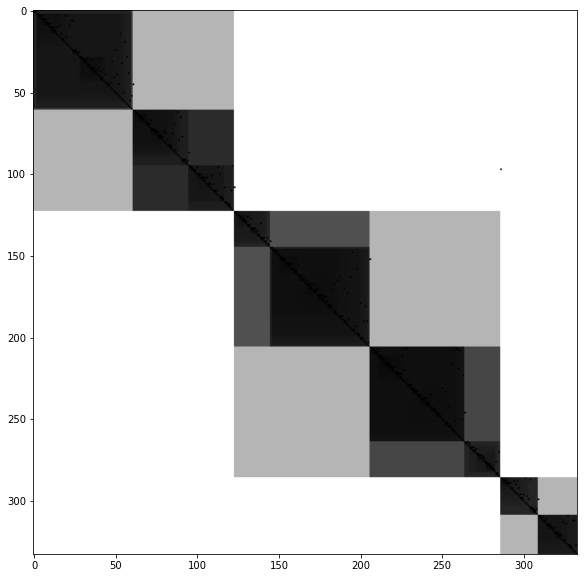

In [65]:
pyclustertend.ivat(X_)

In [66]:
max_k = 20
inertias = []
for k in range(2, max_k + 1):
    kmeans = cluster.KMeans(k)
    kmeans.fit(X_)
    inertias.append(kmeans.inertia_)

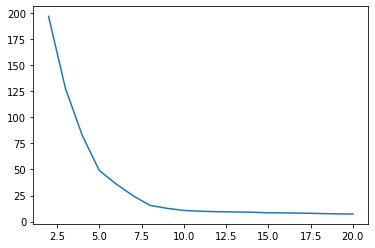

In [67]:
plt.plot(list(range(2, max_k + 1)), inertias)

In [68]:
kmeans = cluster.KMeans(8)
kmeans.fit(X_)

KMeans()

In [69]:
clusters = kmeans.predict(X_)

In [70]:
clusters

array([3, 5, 5, 5, 3, 5, 3, 5, 3, 3, 5, 5, 3, 5, 3, 6, 7, 6, 7, 7, 6, 7,
       6, 6, 7, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4,
       6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4,
       0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [71]:
species_counts = defaultdict(lambda: defaultdict(int))
species = df['species'].values

In [72]:
for (s, c) in zip(species, clusters):
    species_counts[c][s] += 1

In [73]:
species_counts

defaultdict(<function __main__.<lambda>()>,
            {3: defaultdict(int, {'Adelie': 23}),
             5: defaultdict(int, {'Adelie': 24}),
             6: defaultdict(int, {'Adelie': 22}),
             7: defaultdict(int, {'Adelie': 22}),
             0: defaultdict(int, {'Adelie': 27, 'Chinstrap': 34}),
             4: defaultdict(int, {'Adelie': 28, 'Chinstrap': 34}),
             2: defaultdict(int, {'Gentoo': 58}),
             1: defaultdict(int, {'Gentoo': 61})})

In [74]:
print(metrics.silhouette_score(X_, clusters))

0.7117460239089894


In [89]:
len(to_cluster)

333

In [77]:
max_k = 40
score = []
for k in range(2, max_k + 1):
    kmeans = cluster.KMeans(k)
    kmeans.fit(X_)
    clusters = kmeans.predict(X_)
    score.append(metrics.silhouette_score(X_, clusters))

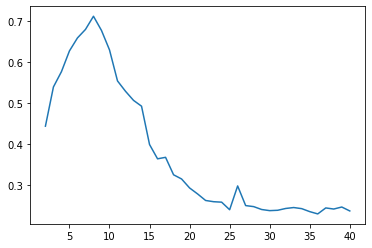

In [78]:
plt.plot(list(range(2, max_k + 1)), score)